In [ ]:
# 회기(regression)
# 회기 문제는 데이터 경향성(추세)으로 연속적인 수치를 예측하는 문제
# e. g. 신장(키) 데이터로 체중을 예측, 지금까지의 주가흐름으로 내일의 주가 예측, 투입한 광고비로 앱 다운로드 수를 예측 등
# 위와 같은 문제들의 예측 결과 값은 연속적인 수치가 된다.
# 연속적인 수치는 직선을 이용해 데이터의 경향성을 파악할 수 있다.
# 직선을 이용하면 기존 데이터에는 없는 점의 위치도 어느 정도 예측할 수 있다.
# 마찬가지로 신경망을 이용하면 복잡한 데이테의 예측을 수행 가능하다.
# 회기 문제의 경우 출력층의 출력이 그대로 예측값이 된다.

# 분류(classification)
# 분류 문제는 데이터를 정해진 범주에 따라 분류하는 것이다.
# e. g. 앞의 이미지로 식물을 분류, 사진 속 인물을 남녀로 분류, 몸체의 크기와 특징으로 돌고래와 고래를 분류 등
# 위와 같은 문제들의 결과 값은 '단풍나무', '남자', '고래'처럼 이산값(정확하게 분류되는)이 된다.
# 신경망으로 이런 분류가 가능하다면 그래프에 새로 추가되는 점이 어느 그룹에 속하는지도 예측이 가능하다.
# 만약 단풍나무, 은행나무, 진달래의 3개의 범주로 분류한다면 출력층 또한 뉴런은 3개가 된다.
# 이때 각 뉴런들의 출력값은 각 범주로 분류될 확률이 되고 확률이 가장 큰 값이 해당 범주가 된다고 판단하는 것이 타당하다.

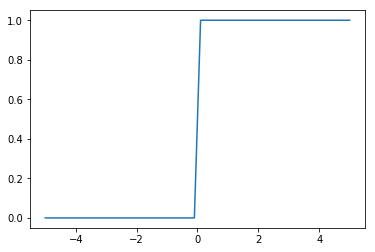

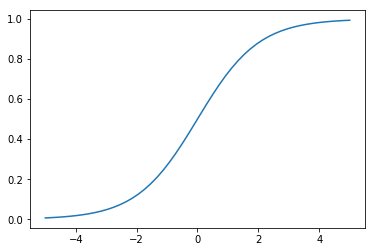

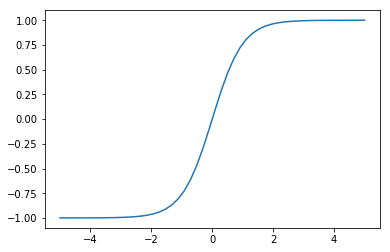

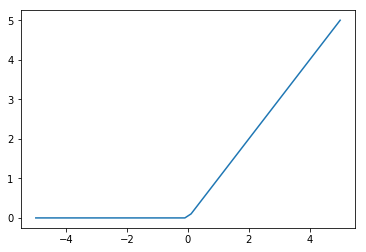

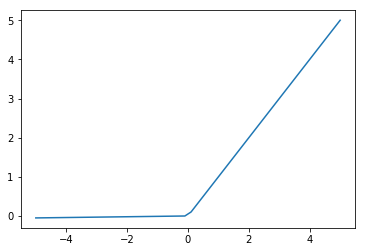

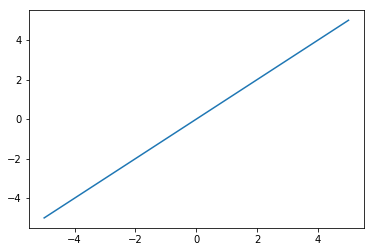

[0.09003057 0.24472847 0.66524096]


In [2]:
# 활성화 함수
# 활성화 함수는 뉴런을 흥분시키기 위한 함수이다.
# 뉴런으로 들어오는 모든 입력에 가중치를 곱하고 그것들을 합산한 값에 편향을 더한 후, 뉴런의 흥분 상태를 표시하는 신호로 전환한다.
# 활성화 함수가 없으면 뉴런의 연산은 단순한 곱셈의 합이 되어버려 신경망이 갖는 풍부한 표현력을 잃어버리게 된다.

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 계단 함수(step function)
# y = 0 (x <= 0)
#   = 1 (x > 0)
# 뉴런의 흥분 상태를 0과 1로 간단하게 표시가 가능
# 0, 1의 중간 상태를 나타낼 수 없는 단점이 존재
# 계단 함수는 신경망의 기원이 되는 퍼셉트론(perceptron)에서 이용
# 퍼셉트론은 모든 신호가 0 아니면 1로 표시되는 매우 간단한 네트워크

def step_function(x):
    return np.where(x<=0, 0, 1) # x가 0보다 작거나 같다면 0, 아니면 1

x = np.linspace(-5, 5)
y = step_function(x)

plt.plot(x, y)
plt.show()

# 시그모이드 함수(sigmoid function)
# 0과 1사이를 매끄럽게 변화하는 함수
# 입력값 x가 작을수록 출력값 y는 0에 가깝게
# x가 커지면 y는 1에 근접하게 된다.
# y = 1 / 1 + exp(-x)
# 매끄러운 곡선이므로 0과 1의 중간 상태를 나타낼 수 있다.
# 미분이 가능하다. y' = (1 - y)y 가 된다.

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

# tanh(hyperbolic tangent)
# -1 과 1사이에서 매끄러운 곡선이 된다.
# y = exp(x) - exp(-x) / exp(x) + exp(-x)

def tanh_function(x):
    return np.tanh(x)

x = np.linspace(-5, 5)
y = tanh_function(x)

plt.plot(x, y)
plt.show()

# ReLU (Rectified Linear Unirt)
# 램프 함수(ramp function)라고도 불린다.
# y = 0 (x <= 0)
#   = x (x > 0)
# ReLU의 도함수
# y = 0 (x <= 0)
#   = 1 (x > 0)이 된다.
# 즉, x가 음수이면 y는 0, x가 양수이면 1이 되어 미분값 x에 상관없이 안정적인 값을 얻을 수 있다.

def relu_function(x):
    return np.where(x <= 0, 0, x)

x = np.linspace(-5, 5)
y = relu_function(x)

plt.plot(x, y)
plt.show()

# Leaky ReLU
# ReLU를 개선한 것
# x가 음수인 영역에서 그래프의 직선이 조금 기울여 진다.
# y = 0.01x (x <= 0)
#   = x     (x > 0)
# ReLU에서 출력이 0이 되어 더 이상 학습이 진행되지 않는 뉴런이 다수 발생하는 dying ReLU 현상을 피할 수 있게 했다

def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)

x = np.linspace(-5, 5)
y = leaky_relu_function(x)

plt.plot(x, y)
plt.show()

# 항등 함수(identity function)
# 입력값이 그대로 출력값으로 반환되는 함수
# y = x
# 신경망의 출력층은 항등 함수와 소프트맥스 함수 같은 활성화 함수를 자주 사용
# 항등 함수는 회귀 문제를 다룰 때 많이 선택한다.
# 항등 함수는 출력범위에 제한이 없고 연속적이기 때문에 연속적인 수치를 예측하는 회귀 문제를 다룰 때 적합

x = np.linspace(-5, 5)
y = x

plt.plot(x, y)
plt.show()

# 소프트맥스 함수(softmax function)
# 분류 문제를 다룰 때 적합한 활성화 함수
# 각 뉴런에서 활성화 함수를 통과한 값은 0에서 1사이가 된다.
# 소프트맥스 함수 값은 분류 문제에서 각 뉴런이 특정한 범주로 분류될 확률을 나타낼 때 쓰일 수 있다.

def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x))

y = softmax_function(np.array([1, 2, 3]))
print(y)

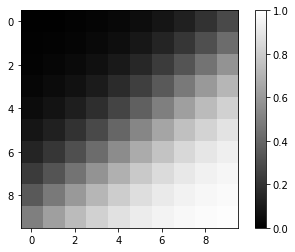

In [4]:
# 신경망 구현

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 단일 뉴런 구현
# 검은색은 출력값이 0, 즉 뉴런이 흥분하지 않은 상태
# 흰색은 출력값이 1, 즉 뉴런이 흥분한 상태를 나타낸다.
# 그래프에서 좌상단부의 검은색 영역부터 우하단부의 흰색 영역까지의 출력값은 연속적으로 변화한다.
# 그 이유는 뉴런의 활성화 함수로 시그모이드 함수를 이용했기 때문에 0과 1사이를 표현하기 때문이다.

X = np.arange(-1.0, 1.0, 0.2)             # 10개의 원소 수
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))                    # 출력값을 저장할 10 x 10 그리드

# 가중치와 편향의 영향
# 가중치가 0에 가까우면 영향력이 작게 되고
# 0보다 커지면 영향력이 확대되며
# 음수가 되면 영향력은 반대가 된다.
# 편향 값은  음수일 경우 검은색 영역이 넓어 뉴런이 흥분하기 어려운 상태가 되고
# 양수인 경우 흰색 영역이 넓어 뉴런이 흥분하기 쉬운 상태가 된다.
# 즉, 편향 값은 뉴런이 흥분하기 쉬운 정도를 결정한다.
w_x = 2.5                                 # x, y값의 입력 가중치
w_y = 3.0

bias = 0.1                                # 편향

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        
        # 입력과 가중치 곱의 합 + 편향
        u = X[i]*w_x + Y[j]*w_y + bias
        
        # 그리드맵에 출력값 저장
        y = 1 / (1+np.exp(-u))            # 시그모이드 함수
        Z[j][i] = y                       # 행렬을 그래프 x, y축으로 나타내기위해 Z[j][i]가 되었다.
        
# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()


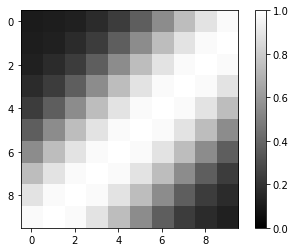

In [9]:
# 다중 뉴런 구성

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 신경망(회귀)
# 입력층(뉴런 수 : n = 2), 은닉층(n = 2), 출력층(n = 1)의 3층 구조
# 활성화 함수는 회귀 문제에 적합한 항등함수인 sigmoid를 사용

# x, y 값
X = np.arange(-1.0, 1.0, 0.2)                  # 원소는 10개
Y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10 x 10 그리드
Z = np.zeros((10, 10))

# 가중치
# 입력층의 뉴런 수는 2이고 중간층의 뉴런 수는 2이므로,
# 은닉층에는 2 x 2 = 4개의 가중치가 필요
# 또한 은닉층의 뉴런의 수는 2, 출력층의 뉴런의 수는 1이프로
# 출력층에서는 2 x 1 = 2개의 가중치가 필요
w_im = np.array([[4.0, 4.0],
                 [4.0, 4.0]])                   # 은닉층 2 x 2 행렬
w_mo = np.array([[1.0],
                 [-1.0]])                       # 출력층 2 x 10 행렬

# 편향
# 편향의 수는 뉴런의 수와 일치한다.
b_im = np.array([3.0, -3.0])                    # 은닉층
b_mo = np.array([0.1])                          # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1+np.exp(-u))                  # sigmoid 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b                        # u는 배열끼리의 연산이므로 결과 값이 하나 더라도 배열 형태이다.
    return u                                   # 항등 함수

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        
        # 순전파
        inp = np.array([X[i], Y[j]])            # 입력층
        mid = middle_layer(inp, w_im, b_im)     # 은닉층
        out = output_layer(mid, w_mo, b_mo)     # 출력층
        
        # 그리드맵에 신경망 출력값 저장
        Z[j][i] = out[0]                        # out은 원소 수 1개의 배열(u) 이기 때문이다.
                                                # 행렬을 그래프 x, y축으로 나타내기위해 Z[j][i]가 되었다.
        
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

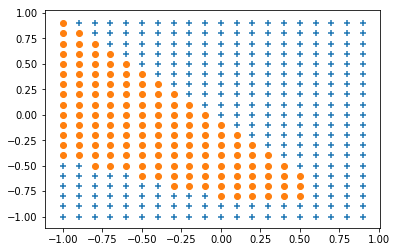

In [12]:
# 신경망(분류)
# 입력층(뉴런 수 : n = 2), 은닉층(n = 2), 출력층(n = 2)의 3층 구조
# 활성화 함수로는 분류에 적합한 softmax 함수 사용

# x, y 값
X = np.arange(-1.0, 1.0, 0.1)                  # 원소는 20개
Y = np.arange(-1.0, 1.0, 0.1)

# 가중치
# 입력층의 뉴런 수는 2이고 중간층의 뉴런 수는 2이므로,
# 은닉층에는 2 x 2 = 4개의 가중치가 필요
# 또한 은닉층의 뉴런의 수는 2, 출력층의 뉴런의 수는 1이프로
# 출력층에서는 2 x 2 = 4개의 가중치가 필요
w_im = np.array([[1.0, 2.0],
                 [2.0, 3.0]])                   # 은닉층 2 x 2 행렬
w_mo = np.array([[-1.0, 1.0],
                 [1.0, -1.0]])                  # 출력층 2 x 2 행렬

# 편향
# 편향의 수는 뉴런의 수와 일치한다.
b_im = np.array([0.3, -0.3])                    # 은닉층
b_mo = np.array([0.4, 0.1])                     # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1+np.exp(-u))                  # sigmoid 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b                        
    return np.exp(u)/np.sum(np.exp(u))         # 소프트맥스 함수

# 분류 결과를 저장하는 리스트
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# 그리드맵의 각 그리드별 신경망 연산
for i in range(20):
    for j in range(20):
        
        # 순전파
        inp = np.array([X[i], Y[j]])            # 입력층
        mid = middle_layer(inp, w_im, b_im)     # 은닉층
        out = output_layer(mid, w_mo, b_mo)     # 출력층
        
        # 확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
        
# 산포도 표시
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()
